## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from matplotlib import pyplot as plt 
import numpy as np

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


###4. Find no.of samples in training and test dataset

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

###5. Find dimensions of an image in the dataset

### 6. Verify if existing labels/Classes are correct 

In [0]:
x_train =np.array(x_train).astype('float32')
x_test =np.array(x_test).astype('float32')

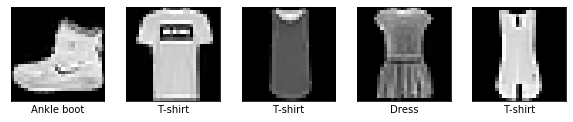

In [10]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_cat=tf.keras.utils.to_categorical(y_train,num_classes=None,dtype='float32')
y_test_cat=tf.keras.utils.to_categorical(y_test,num_classes=None,dtype='float32')

In [12]:
y_train_cat[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm=x_train/255
x_test_norm=x_test/255

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_test_norm= tf.keras.backend.expand_dims(x_test_norm, 3)
x_train_norm= tf.keras.backend.expand_dims(x_train_norm, 3)

In [15]:
x_test_norm.shape

TensorShape([10000, 28, 28, 1])

In [16]:
x_train_norm.shape

TensorShape([60000, 28, 28, 1])

###10. Import the necessary layers from keras to build the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())


In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
#Train the model
model.fit(x_train_norm,y_train_cat,          
          validation_data=(x_test_norm,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3542 - accuracy: 0.8724 - val_loss: 0.2791 - val_accuracy: 0.8994
Epoch 2/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2132 - accuracy: 0.9208 - val_loss: 0.2708 - val_accuracy: 0.9040
Epoch 3/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1432 - accuracy: 0.9465 - val_loss: 0.3021 - val_accuracy: 0.9042
Epoch 4/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0956 - accuracy: 0.9654 - val_loss: 0.3091 - val_accuracy: 0.9084
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0604 - accuracy: 0.9784 - val_loss: 0.3652 - val_accuracy: 0.9052
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0432 - accuracy: 0.9846 - val_loss: 0.4265 - val_accuracy: 0.9076
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())


In [0]:
#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Flatten the output
model2.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))



#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

###13. Verify accuracy of the model

> 

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
#Train the model
model2.fit(x_train_norm,y_train_cat,          
          validation_data=(x_test_norm,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3770 - accuracy: 0.8649 - val_loss: 0.2826 - val_accuracy: 0.9006
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2434 - accuracy: 0.9101 - val_loss: 0.2455 - val_accuracy: 0.9125
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1941 - accuracy: 0.9275 - val_loss: 0.2324 - val_accuracy: 0.9152
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1603 - accuracy: 0.9397 - val_loss: 0.2362 - val_accuracy: 0.9207
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1335 - accuracy: 0.9499 - val_loss: 0.2451 - val_accuracy: 0.9189
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1117 - accuracy: 0.9582 - val_loss: 0.2707 - val_accuracy: 0.9170
Epoch 7/10
60000/60000 [==========================

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_norm)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

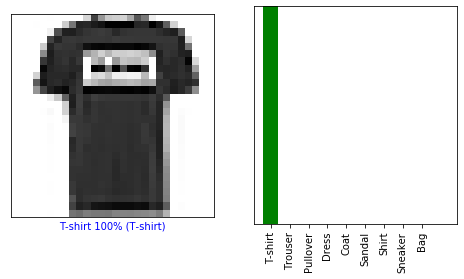

In [38]:
#Replace value of i with other index to check other product
i = 1
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True, vertical_flip=True,rotation_range=5)

In [0]:
datagen.fit(x_train_norm)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

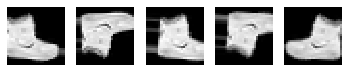

In [43]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_norm[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()